# <p style="background-image: url(https://th.bing.com/th/id/OIP.QDu8NVyGf3k-w9iVMvmKJAHaEO?rs=1&pid=ImgDetMain);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashedrgb(133, 20, 198); box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">🚀 Rainfall Prediction 🎉🔒</p>

[![Alt Text](https://th.bing.com/th/id/R.72ce90a970127b347560de222160c902?rik=GhTp3OGXuEYe3A&pid=ImgRaw&r=0)]([Link_URL](https://th.bing.com/th/id/R.72ce90a970127b347560de222160c902?rik=GhTp3OGXuEYe3A&pid=ImgRaw&r=0))


<div style="border: 2px solid rgb(127, 20, 198); padding: 10px; max-width: 1000px; margin: 0 auto;">
    <p>
        "The only way to do great work is to love what you do." - Steve Jobs 🌟
    </p>
    <p>
        I am <b>Dur e Yashfeen</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of KeepLearning and KeepSupporting, as I am committed to constant growth and uplifting others in the field. 🚀
    </p>
    <div style="text-align: center;">
    </div>
    <p>
        You can find more about me on my <a href="https://www.linkedin.com/in/dur-e-yashfeen-b76a19204/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries! 📊
    </p>
    <p>My skills include:</p>
    <ul style="list-style-type: disc; margin-left: 20px;">
        <li>Data Analysis 📉</li>
        <li>Machine Learning 🤖</li>
        <li>Deep Learning 🧠</li>
        <li>Statistical Modeling 📈</li>
        <li>Data Visualization 📊</li>
    </ul>
    <p> If you find any content helpful, consider giving it an upvote. Your support means a lot! 👍</p>
</div>

In [27]:
# import libaraies for binary classification
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display, HTML
import warnings
from colorama import Fore, Style
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

# Set the default renderer for both Plotly Express and Graph Objects
pio.renderers.default = 'iframe_connected'


In [4]:
df_tr = pd.read_csv("./playground-series-s5e3/train.csv")
df_ts = pd.read_csv("./playground-series-s5e3/test.csv")
sample = pd.read_csv("./playground-series-s5e3/sample_submission.csv")

# <p style="background-image: url(https://th.bing.com/th/id/OIP.QDu8NVyGf3k-w9iVMvmKJAHaEO?rs=1&pid=ImgDetMain);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashedrgb(118, 20, 198); box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">Basic Overview Of Data</p>

<span style="font-size: 14px; font-family: Verdana; background-color:rgb(127, 20, 198); color: white; border: 2px solid #ccc; padding: 10px; border-radius: 10px; display: inline-block;">
  I've created a convenient function to display detailed information about the dataset with just one click. This function provides essential insights into the dataset's structure, summary statistics, and data types, allowing for a quick understanding of its contents. Feel free to utilize this function in your analysis, but please ensure to give proper reference when using it. Your support and acknowledgment are greatly appreciated!
</span>

In [8]:
from IPython.display import display, HTML

def styled_heading(text, background_color='#800080', text_color='white'):
    return f"""
    <p style="
        background-color: {background_color};
        font-family: Roboto, sans-serif;
        font-size: 150%;
        color: {text_color};
        text-align: center;
        border-radius: 10px;
        padding: 10px;
        font-weight: bold;
        box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);
        width: fit-content;
        margin: 0 auto;
    ">
        {text}
    </p>
    """

def style_table(df):
    styled_df = df.style.set_table_styles([
        {"selector": "th", "props": [("color", "white"), ("background-color", "#800080"), ("font-family", "Roboto, sans-serif")]}
    ]).set_properties(**{"text-align": "center", "font-family": "Roboto, sans-serif"}).hide(axis="index")
    return styled_df.to_html()

def print_dataset_analysis(train_dataset, n_top=5, heading_color='#800080', text_color='white'):
    train_heading = styled_heading(f"📊 Basic Overview of Data", heading_color, text_color)
    display(HTML(train_heading))
    display(HTML(style_table(train_dataset.head(n_top))))

    summary_heading = styled_heading("🔍 Data Summary", heading_color, text_color)
    display(HTML(summary_heading))
    display(HTML(style_table(train_dataset.describe())))

    null_heading = styled_heading("🚫 Null Values in Data", heading_color, text_color)
    train_null_count = train_dataset.isnull().sum()
    display(HTML(null_heading))
    if train_null_count.sum() == 0:
        display(HTML("<p style='font-family: Roboto, sans-serif;'>No null values in the dataset.</p>"))
    else:
        display(HTML("<h3 style='font-family: Roboto, sans-serif;'>Null Values:</h3>"))
        display(HTML(style_table(train_null_count[train_null_count > 0].to_frame())))
        display(HTML("<p style='font-family: Roboto, sans-serif;'>These are the null values.</p>"))

    duplicate_heading = styled_heading("♻️ Duplicate Values in Data", heading_color, text_color)
    train_duplicates = train_dataset.duplicated().sum()
    display(HTML(duplicate_heading))
    display(HTML("<h3 style='font-family: Roboto, sans-serif;'>Duplicates:</h3>"))
    display(HTML(f"<p style='font-family: Roboto, sans-serif;'>{train_duplicates} duplicate rows found.</p>"))

    shape_heading = styled_heading("📏 Data Shape", heading_color, text_color)
    display(HTML(shape_heading))
    display(HTML("<h3 style='font-family: Roboto, sans-serif;'>Shape:</h3>"))
    display(HTML(f"<p style='font-family: Roboto, sans-serif;'>Rows: {train_dataset.shape[0]}, Columns: {train_dataset.shape[1]}</p>"))

def print_unique_values(train_dataset, heading_color='#800080', text_color='white'):
    unique_values_heading = styled_heading("🔢 Unique Values in Data", heading_color, text_color)
    display(HTML(unique_values_heading))
    unique_values_table = pd.DataFrame({
        'Column Name': train_dataset.columns,
        'Data Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[:7])) for col in train_dataset.columns]
    })
    display(HTML(style_table(unique_values_table)))

# Example usage with `df_tr`
print_dataset_analysis(df_tr, n_top=5, heading_color='#800080', text_color='white')
print_unique_values(df_tr, heading_color='#800080', text_color='white')



id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.400000,21.200000,20.600000,19.900000,19.400000,87.000000,88.000000,1.100000,60.000000,17.200000,1
1,2,1019.500000,16.200000,16.900000,15.800000,15.400000,95.000000,91.000000,0.000000,50.000000,21.900000,1
2,3,1024.100000,19.400000,16.100000,14.600000,9.300000,75.000000,47.000000,8.300000,70.000000,18.100000,1
3,4,1013.400000,18.100000,17.800000,16.900000,16.800000,95.000000,95.000000,0.000000,60.000000,35.600000,1
4,5,1021.800000,21.300000,18.400000,15.200000,9.600000,52.000000,45.000000,3.600000,40.000000,24.800000,0


id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


Column Name,Data Type,Unique Values
id,int64,"0, 1, 2, 3, 4, 5, 6"
day,int64,"1, 2, 3, 4, 5, 6, 7"
pressure,float64,"1017.4, 1019.5, 1024.1, 1013.4, 1021.8, 1022.7, 1022.8"
maxtemp,float64,"21.2, 16.2, 19.4, 18.1, 21.3, 20.6, 19.5"
temparature,float64,"20.6, 16.9, 16.1, 17.8, 18.4, 18.6, 13.6"
mintemp,float64,"19.9, 15.8, 14.6, 16.9, 15.2, 16.5, 15.3"
dewpoint,float64,"19.4, 15.4, 9.3, 16.8, 9.6, 12.5, 11.3"
humidity,float64,"87.0, 95.0, 75.0, 52.0, 79.0, 56.0, 96.0"
cloud,float64,"88.0, 91.0, 47.0, 95.0, 45.0, 81.0, 46.0"
sunshine,float64,"1.1, 0.0, 8.3, 3.6, 7.6, 1.0, 1.2"


In [5]:
def summary_statistics(df):
    """Returns mean, median, min, and max of all numeric columns."""
    return df.agg(['mean', 'median', 'min', 'max'])

# Example usage:
summary_stats = summary_statistics(df_tr)
print(summary_stats)

            id         day     pressure    maxtemp  temparature    mintemp  \
mean    1094.5  179.948402  1013.602146  26.365799    23.953059  22.170091   
median  1094.5  178.500000  1013.000000  27.800000    25.500000  23.850000   
min        0.0    1.000000   999.000000  10.400000     7.400000   4.000000   
max     2189.0  365.000000  1034.600000  36.000000    31.500000  29.800000   

         dewpoint  humidity       cloud   sunshine  winddirection  windspeed  \
mean    20.454566  82.03653   75.721918   3.744429     104.863151  21.804703   
median  22.150000  82.00000   83.000000   2.400000      70.000000  20.500000   
min     -0.300000  39.00000    2.000000   0.000000      10.000000   4.400000   
max     26.700000  98.00000  100.000000  12.100000     300.000000  59.500000   

        rainfall  
mean    0.753425  
median  1.000000  
min     0.000000  
max     1.000000  


In [6]:
# Compute Standard Deviation, Skewness, Kurtosis
stats = df_tr.describe().T
stats['std_dev'] = df_tr.std()
stats['skewness'] = df_tr.skew()
stats['kurtosis'] = df_tr.kurtosis()

# Display statistics
print(stats[['mean', 'std_dev', 'skewness', 'kurtosis']])

                      mean     std_dev  skewness  kurtosis
id             1094.500000  632.342866  0.000000 -1.200000
day             179.948402  105.203592  0.030615 -1.193005
pressure       1013.602146    5.655366  0.284062 -0.502999
maxtemp          26.365799    5.654330 -0.490890 -0.907045
temparature      23.953059    5.222410 -0.557471 -0.835119
mintemp          22.170091    5.059120 -0.649179 -0.608251
dewpoint         20.454566    5.288406 -0.997889  0.418278
humidity         82.036530    7.800654 -0.561541  1.399138
cloud            75.721918   18.026498 -1.339274  1.053899
sunshine          3.744429    3.626327  0.639871 -1.016200
winddirection   104.863151   80.002416  0.708063 -1.071875
windspeed        21.804703    9.898659  0.769390  0.285318
rainfall          0.753425    0.431116 -1.176743 -0.615838


# <p style="background-image: url(https://th.bing.com/th/id/OIP.QDu8NVyGf3k-w9iVMvmKJAHaEO?rs=1&pid=ImgDetMain);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashedrgb(127, 20, 198); box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">Data Visualizations</p>

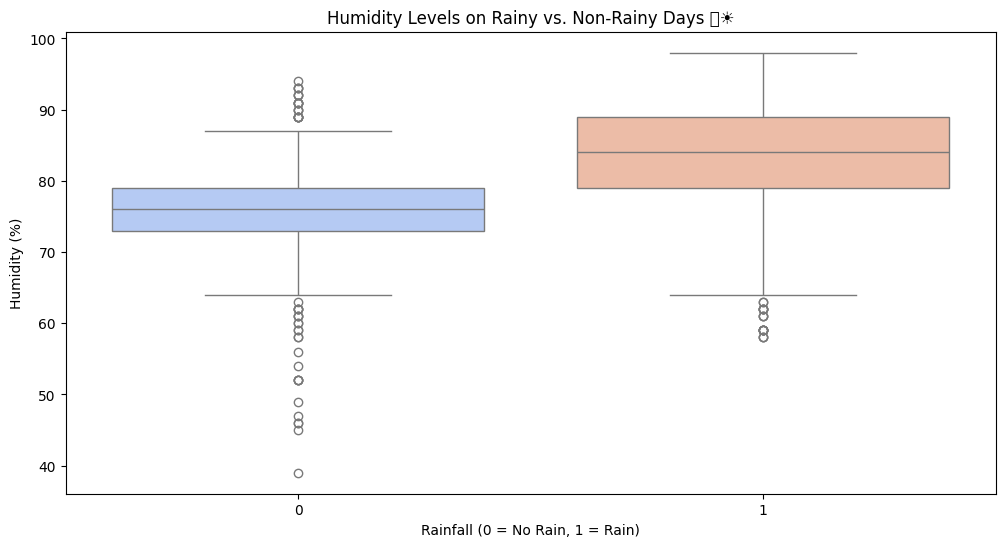

In [15]:
# Split data by Rainfall (0 vs. 1)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_tr["rainfall"], y=df_tr["humidity"], palette="coolwarm")
plt.title("Humidity Levels on Rainy vs. Non-Rainy Days 🌧️☀️")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Humidity (%)")
plt.show()


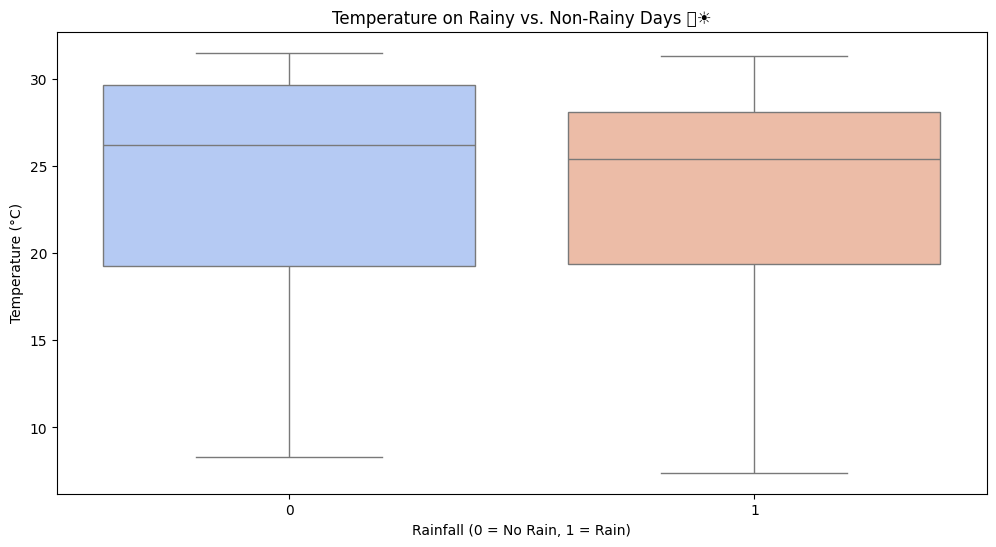

In [16]:

# Repeat for Temperature
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_tr["rainfall"], y=df_tr["temparature"], palette="coolwarm")
plt.title("Temperature on Rainy vs. Non-Rainy Days 🌧️☀️")
plt.xlabel("Rainfall (0 = No Rain, 1 = Rain)")
plt.ylabel("Temperature (°C)")
plt.show()


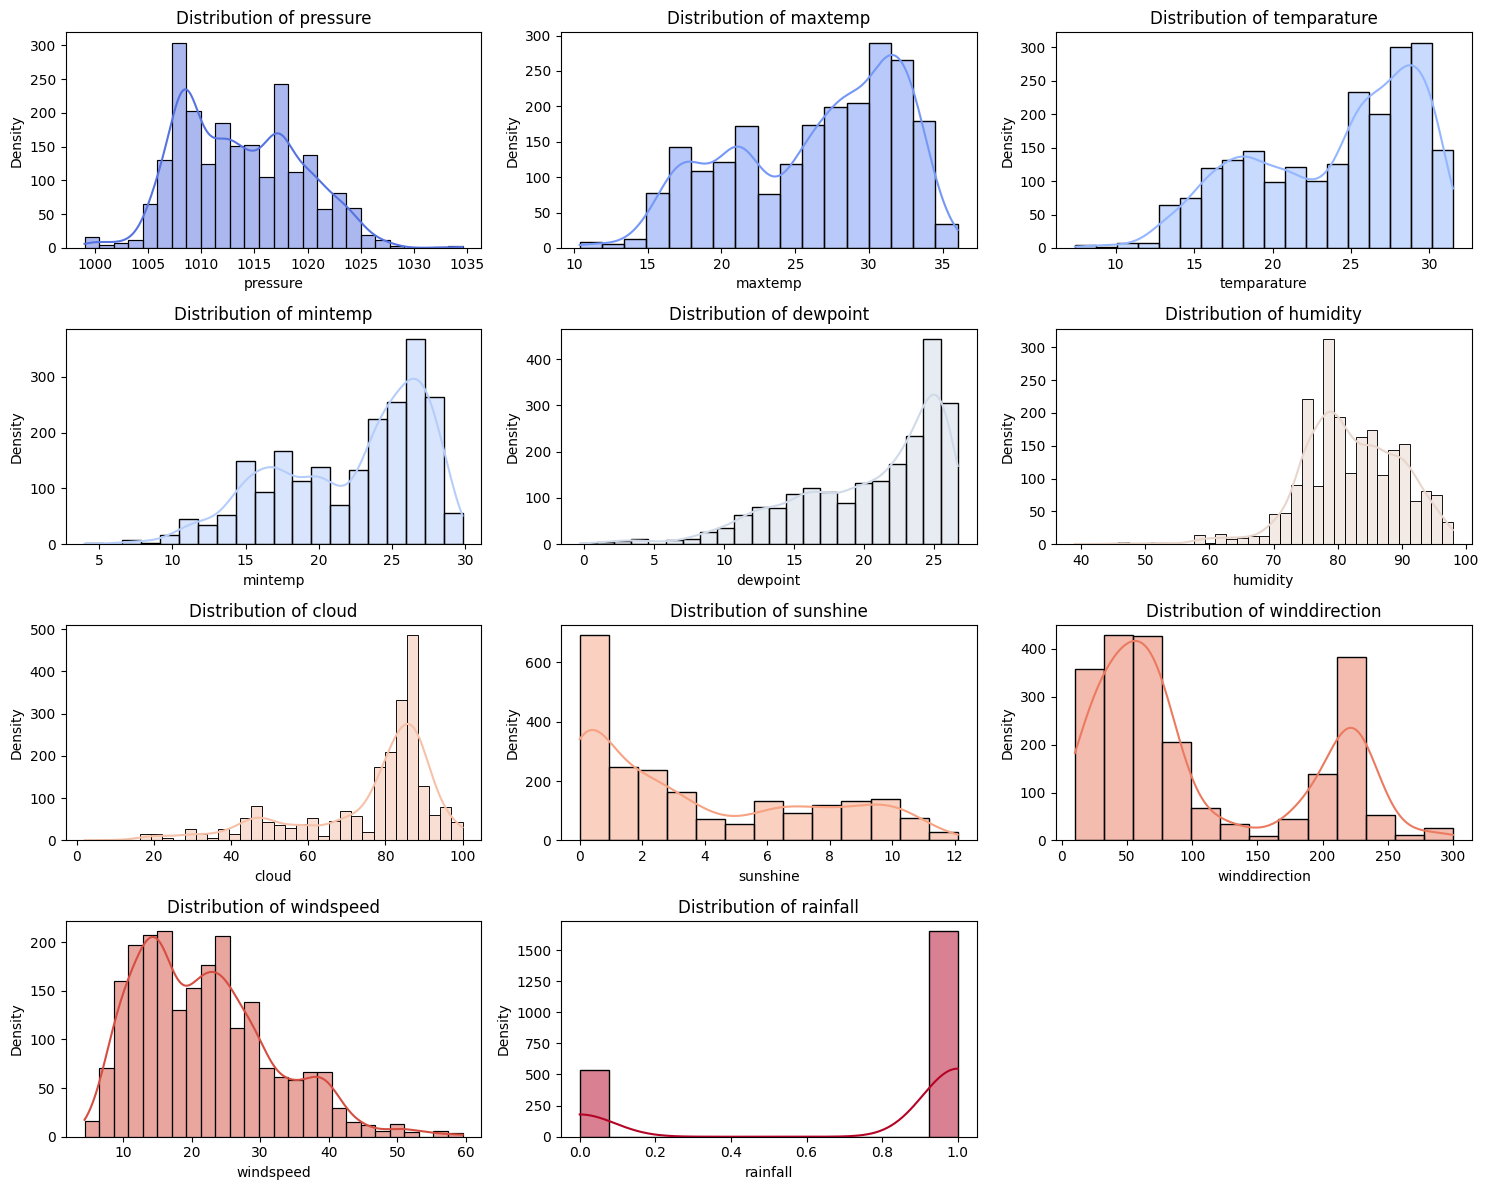

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a rainbow color palette
coolwarm_cmap = plt.cm.coolwarm  # Get the actual colormap

# Select relevant features
columns_to_check = ['pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall']

# Create histograms with KDE
plt.figure(figsize=(15, 12))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    
    # Choose a color from the colormap
    color = coolwarm_cmap(i / len(columns_to_check))  
    
    sns.histplot(df_tr[col], kde=True, color=color)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


### Checking the Correlation (Relationship of train dataset)

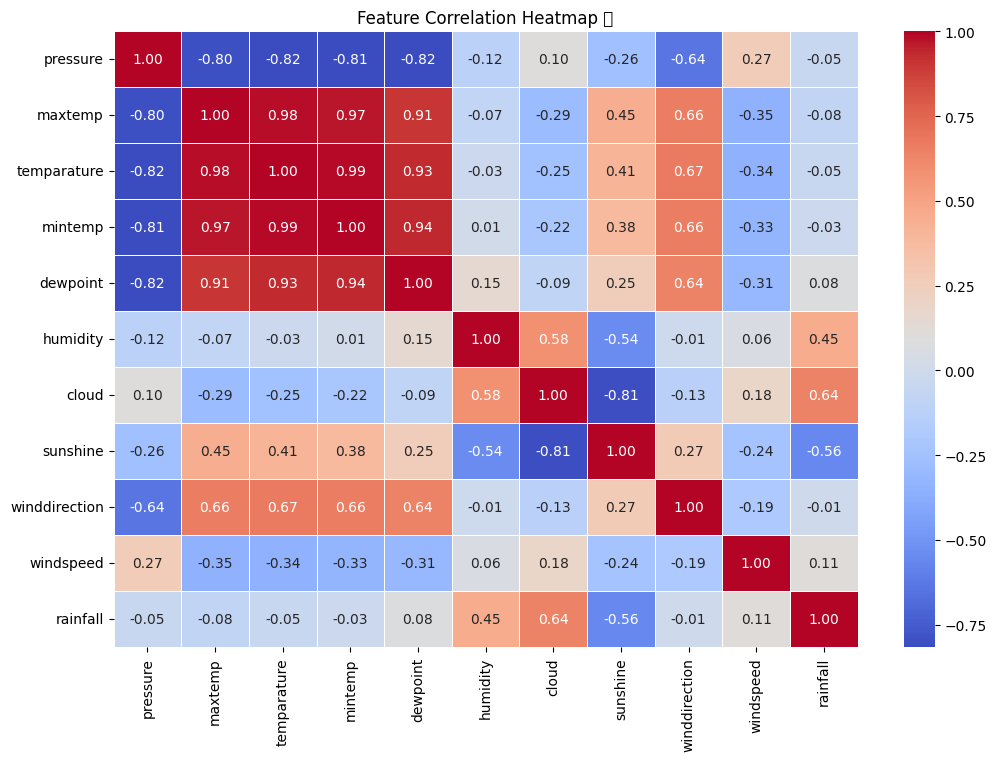

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_tr[columns_to_check].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap 🌧️")
plt.show()

Text(0.5, 1.0, 'Effect of Rainfall on Temperature')

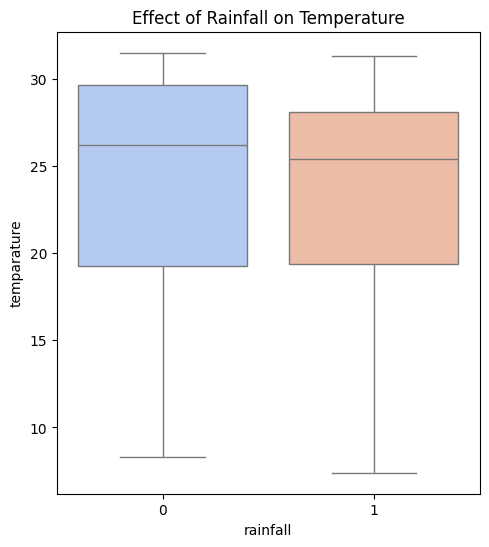

In [20]:
plt.figure(figsize=(12, 6))

# Boxplot for Temperature
plt.subplot(1, 2, 1)
sns.boxplot(x=df_tr["rainfall"], y=df_tr["temparature"], palette="coolwarm")
plt.title("Effect of Rainfall on Temperature")


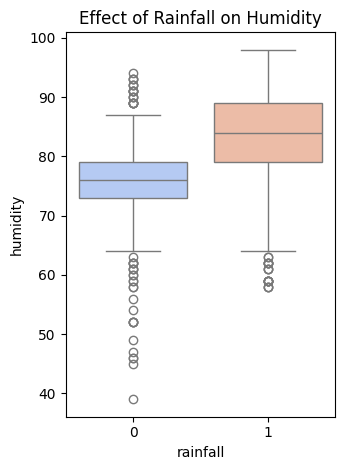

In [21]:

# Boxplot for Humidity
plt.subplot(1, 2, 2)
sns.boxplot(x=df_tr["rainfall"], y=df_tr["humidity"], palette="coolwarm")
plt.title("Effect of Rainfall on Humidity")

plt.tight_layout()

# <p style="background-image: url(https://th.bing.com/th/id/OIP.QDu8NVyGf3k-w9iVMvmKJAHaEO?rs=1&pid=ImgDetMain);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashedrgb(147, 20, 198); box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">Data Preprocessing And Modeling</p>

In [28]:
# ============================
# 🌟 Step 1: Prepare Features & Target
# ============================
X = df_tr.drop(columns=["rainfall"])  # Features
y = df_tr["rainfall"]  # Target variable

# Split into train-test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ============================
# 🌟 Step 2: Define Stable CatBoost Hyperparameters
# ============================
stable_params = {
    "iterations": 500,
    "depth": 6,
    "learning_rate": 0.05,
    "l2_leaf_reg": 3,
    "border_count": 128,
    "bagging_temperature": 0.8,
    "random_strength": 1.5,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "verbose": 100
}

# ============================
# 🌟 Step 3: Train Model Using Stratified K-Fold Cross-Validation
# ============================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize CatBoostClassifier
model = CatBoostClassifier(**stable_params)

# Perform Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1)

# Train Final Model on Full Training Set
model.fit(X_train, y_train)

# ============================
# 🌟 Step 4: Predict Probabilities
# ============================
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for class 1

# Compute AUC-ROC Score
auc = roc_auc_score(y_test, y_pred_proba)

# Print Results
print(f"\n🔥 Cross-Validation AUC-ROC: {cv_scores.mean():.4f}")
print(f"🔥 Final Model AUC-ROC on Test Data: {auc:.4f}")
print("\n🔍 Classification Report:")
print(classification_report(y_test, model.predict(X_test)))

0:	total: 160ms	remaining: 1m 19s
100:	total: 442ms	remaining: 1.75s
200:	total: 724ms	remaining: 1.08s
300:	total: 1.05s	remaining: 694ms
400:	total: 1.3s	remaining: 320ms
499:	total: 1.55s	remaining: 0us

🔥 Cross-Validation AUC-ROC: nan
🔥 Final Model AUC-ROC on Test Data: 0.8604

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       108
           1       0.89      0.93      0.91       330

    accuracy                           0.86       438
   macro avg       0.82      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438



In [29]:
test_preds = model.predict_proba(df_ts)[:, 1] # ✅ This gives probabilities
sample["rainfall"] = test_preds
sample.to_csv("submission_prob_3.csv", index=False)
print(sample.shape)
sample.head()

(730, 2)


,id,rainfall
0,2190,0.996852
1,2191,0.995392
2,2192,0.986833
3,2193,0.144756
4,2194,0.019150


# <p style="background-image: url(https://th.bing.com/th/id/OIP.QDu8NVyGf3k-w9iVMvmKJAHaEO?rs=1&pid=ImgDetMain);font-family:Pacifico ,cursive;font-size:150%; color:#E6E6FA; text-align:center; border-radius: 20%; padding:20px; font-weight: normal; border: 3px dashedrgb(168, 20, 198); box-shadow: 0px 5px 10px  rgba(0, 0, 0, 0.2);text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4); background-size: cover; background-repeat: no-repeat; background-position: center;">The End Thanks For Reading 🔥✨💥</p>